In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.random import normal
from scipy.stats import norm
import pandas as pd
import seaborn as sns

# LDA
## for $P = 1$
Given $X$ training set, classify $x\in X$ belonging to class $k$ such that
$$
    \delta_k(x) = x\frac{\hat{\mu_k}}{\sigma^2} - \frac{\mu^2_k}{2\sigma^2} + \log(\pi_k)
$$
is largest

*Suppose $K=2$, $\pi_1 = \pi_2$ then, the Bayes decision boundary corresponds to*
$$
    x = \frac{\mu_1 + \mu_2}{2}
$$

In [84]:
mu1 = -1.4
mu2 = 1.4
sigma = 1
n1, n2 = 500, 500
X1 = normal(mu1, sigma, size = n1)
X2 = normal(mu2, sigma, size = n2)

muhat1 = np.mean(X1)
muhat2 = np.mean(X2)

pi1 = n1 / (n1+n2)
pi2 = n2 / (n1+n2)

sigmahat2 = sum((X1 - muhat1)**2 + (X2 - muhat2)**2) / (n1 + n2 - 2)

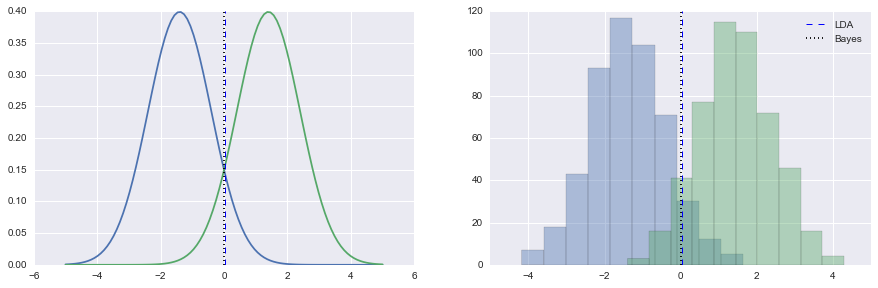

In [85]:
bayes_decision_boundary = (mu1 + mu2)/2
lda_decsion_boundary = (muhat1 + muhat2) / 2

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
xrange = np.linspace(-5, 5, 100)
ax1.plot(xrange, norm.pdf(xrange, loc=mu1))
ax1.plot(xrange, norm.pdf(xrange, loc=mu2))
ax1.axvline(x = lda_decsion_boundary, ymin=0, ymax=1, linestyle="--", linewidth=1, label="LDA")
ax1.axvline(x = bayes_decision_boundary, ymin=0, ymax=1, linestyle=":", color="black", label="Bayes")


ax2 = fig.add_subplot(222)
sns.distplot(X1, kde=False, bins=10)
sns.distplot(X2, kde=False, bins=10)
ax2.axvline(x = lda_decsion_boundary, ymin=0, ymax=1, linestyle="--", linewidth=1, label="LDA")
ax2.axvline(x = bayes_decision_boundary, ymin=0, ymax=1, linestyle=":", color="black", label="Bayes")

plt.legend()
plt.show()

In [86]:
print("LDA DB: {:>8.4f}".format(lda_decsion_boundary))
print("Bayes DB: {:>.4f}".format(bayes_decision_boundary))

LDA DB:   0.0389
Bayes DB: 0.0000


In [87]:
delta_k = lambda x, mu, var, pi: x * (mu/var) + mu**2 / (2 * var) + np.log(pi)

nsize = 200
X1_test = normal(mu1, sigma, size = nsize)
X2_test = normal(mu2, sigma, size = nsize)

df_test ={"X": np.hstack([X1_test, X2_test]),
          "K": np.hstack([np.repeat(1, nsize), np.repeat(2, nsize)])}
df_test = pd.DataFrame(df_test)

delta1_LDA = df_test.X.apply(delta_k, args=(muhat1, sigmahat2, pi1))
delta2_LDA = df_test.X.apply(delta_k, args=(muhat2, sigmahat2, pi2))

delta1_Bayes = df_test.X.apply(delta_k, args=(mu1, sigma**2, pi1))
delta2_Bayes = df_test.X.apply(delta_k, args=(mu2, sigma**2, pi1))

df_test["K_pred_LDA"] = np.where(delta1_LDA > delta2_LDA, 1, 2)
df_test["K_pred_Bayes"] = np.where(delta1_Bayes > delta2_Bayes, 1, 2)

In [88]:
# Error rates
B_er = 1 - np.mean(df_test.K == df_test.K_pred_Bayes)
LDA_er =1 - np.mean(df_test.K == df_test.K_pred_LDA)

print("Bayes Error rate: {:.2%}".format(B_er))
print("LDA Error rate: {:>7.2%}".format(LDA_er))
print("Relative Error: {:>9.4%}".format(LDA_er / B_er - 1))

Bayes Error rate: 7.75%
LDA Error rate:   8.50%
Relative Error:   9.6774%
